## **Part 3 - Data Consistency, Quality Checks, and ML Bonus**


## Step 1: Mount Google Drive
This step connects Google Colab to your Google Drive so you can access stored datasets.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Import Necessary Libraries
Here we import all libraries needed for data analysis, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Step 3: Load Dataset
Load the previously prepared and feature-engineered dataset.

In [4]:
final_dataset_ready = pd.read_csv('/content/final_customer_data_group15.csv')

## Step 3: Data Consistency and Quality Checks
This step ensures the data is clean and ready for modeling.

### Check and Remove Duplicates
# Identify duplicates

In [5]:
duplicates = final_dataset_ready.duplicated().sum()
print(f"Duplicates found: {duplicates}")

Duplicates found: 81


# Remove duplicates

In [6]:
final_dataset_ready = final_dataset_ready.drop_duplicates()

### Validate Categorical Data Consistency
Review the consistency of categorical variables.

In [7]:
categorical_summary = final_dataset_ready[['product_category', 'social_media_platform', 'review_sentiment']].describe(include='object')
print(categorical_summary)

       product_category social_media_platform review_sentiment
count              1267                  1267             1267
unique                5                     5                3
top               Books                TikTok         Positive
freq                293                   310              477


### Generate Numerical Data Summary

In [8]:
numerical_summary = final_dataset_ready.describe()
print(numerical_summary)

       customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
count         1267.000000     1267.000000      1267.000000      1267.000000   
mean           155.820837     1073.226519       291.648945         3.032206   
std             30.879426       42.929716       118.089765         1.177165   
min            101.000000     1001.000000        68.952440         1.000000   
25%            132.000000     1032.000000       194.099302         2.100000   
50%            159.000000     1074.000000       281.091370         3.000000   
75%            186.000000     1107.000000       396.495386         4.000000   
max            199.000000     1150.000000       513.456842         5.000000   

       log_purchase_amount  engagement_score  purchase_interest_score  \
count          1267.000000       1267.000000              1267.000000   
mean              5.580115         77.303078                 3.239937   
std               0.468535         14.520390                 1.090567

## Step 4: Data Visualization
Visualize important distributions to understand the data better.

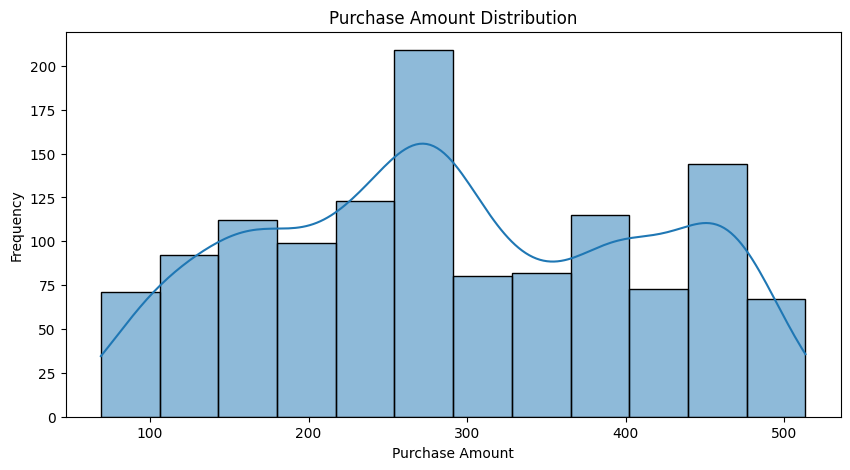

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(final_dataset_ready['purchase_amount'], kde=True) # Changed 'final_customer_data' to 'final_dataset_ready'
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Transaction Amount Distribution

In [10]:
sns.histplot(final_dataset_ready['purchase_amount'], kde=True, ax=axes[0])
axes[0].set_title('Purchase Amount Distribution')

Text(0.5, 1.0, 'Purchase Amount Distribution')

# Customer Engagement Score Distribution

In [18]:
sns.histplot(final_dataset_ready['customer_engagement_score'], kde=True, ax=axes[1])
axes[1].set_title('Customer Engagement Score Distribution')

plt.show()

### Correlation Analysis
Check how different numerical features relate to each other, helping identify important features for modeling.

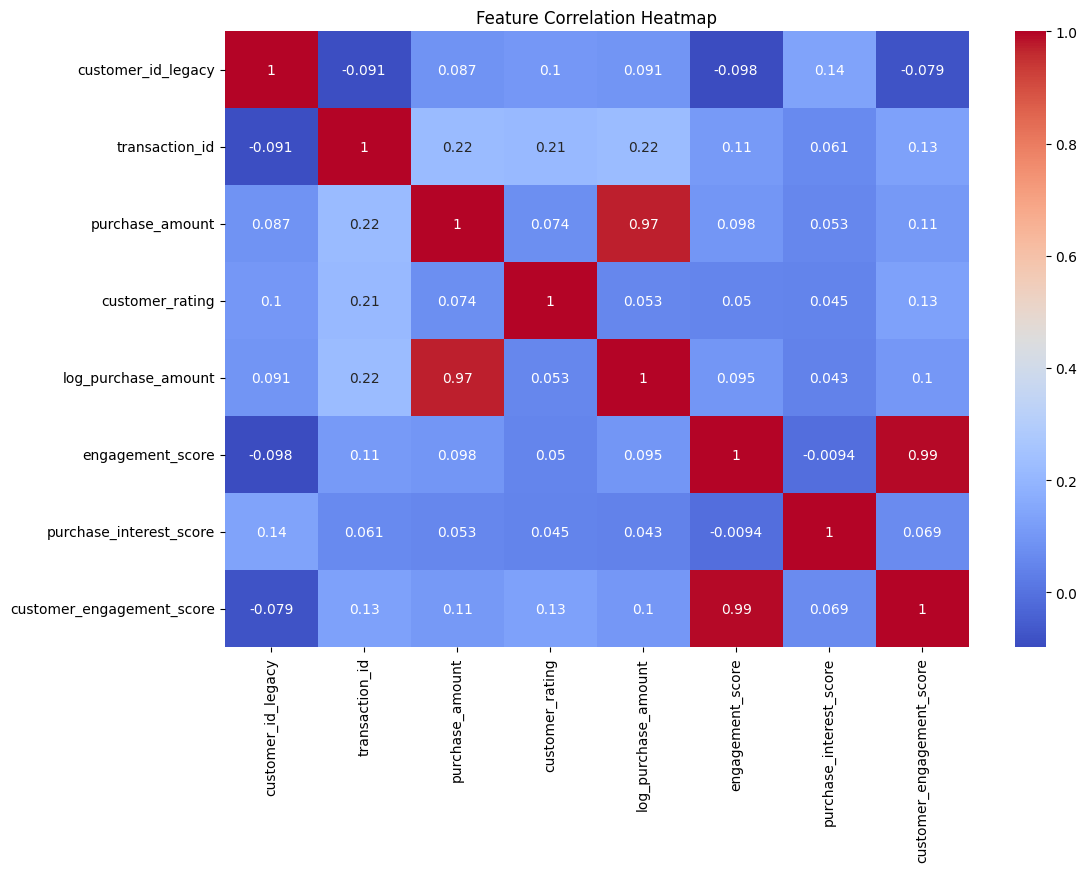

(81,
        product_category social_media_platform review_sentiment
 count              1267                  1267             1267
 unique                5                     5                3
 top               Books                TikTok         Positive
 freq                293                   310              477,
                            customer_id_legacy  transaction_id  \
 customer_id_legacy                   1.000000       -0.091320   
 transaction_id                      -0.091320        1.000000   
 purchase_amount                      0.086667        0.215078   
 customer_rating                      0.101505        0.211499   
 log_purchase_amount                  0.091479        0.221552   
 engagement_score                    -0.098108        0.109216   
 purchase_interest_score              0.136914        0.061256   
 customer_engagement_score           -0.078831        0.129705   
 
                            purchase_amount  customer_rating  \
 customer_id_l

In [19]:
plt.figure(figsize=(12, 8))
# Replaced 'final_customer_data' with 'final_dataset_ready'
corr_matrix = final_dataset_ready.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

duplicates, categorical_summary, corr_matrix  # Changed 'duplicates_count' to 'duplicates'

## Step 5: Machine Learning Modeling
We predict customer spending using two different models: Linear Regression and Random Forest.

### Prepare Data

In [23]:
# Corrected feature selection:
features = ['customer_rating', 'engagement_score', 'purchase_interest_score',
            'customer_engagement_score', 'purchase_amount']

X = final_dataset_ready[features]
y = final_dataset_ready['purchase_amount']


### Split Data into Training and Test Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Models
# Linear Regression

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Random Forest

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluate Models
# Predictions

In [27]:
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Performance Metrics

In [28]:
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
linear_r2 = r2_score(y_test, linear_preds)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print('Linear Regression RMSE:', linear_rmse)
print('Linear Regression R²:', linear_r2)

print('Random Forest RMSE:', rf_rmse)
print('Random Forest R²:', rf_r2)

Linear Regression RMSE: 6.635594169163867e-14
Linear Regression R²: 1.0
Random Forest RMSE: 0.4418392361015475
Random Forest R²: 0.9999865937696846


### Step 6: Export Final Dataset
Finally, save the cleaned and prepared dataset for future use.

In [30]:
final_dataset_ready.to_csv('/content/drive/MyDrive/final_dataset_ready_groupNumber.csv', index=False)


# Sample data for testing predictions (replace values with realistic samples)

In [31]:
sample_data = pd.DataFrame({
    'customer_rating': [4.5, 3.2],
    'engagement_score': [85, 60],
    'purchase_interest_score': [4.7, 3.0],
    'customer_engagement_score': [(4.5 + 85 + 4.7)/3, (3.2 + 60 + 3.0)/3],
    'purchase_amount': [300, 150]  # example known values for checking predictions
})

# Predict using your trained model (assuming Random Forest performed best)
predicted_purchase_amount = rf_model.predict(sample_data)

# Display predictions
for i, prediction in enumerate(predicted_purchase_amount):
    print(f"Predicted Purchase Amount for sample {i+1}: ${prediction:.2f}")


Predicted Purchase Amount for sample 1: $299.62
Predicted Purchase Amount for sample 2: $149.57
